#**Philip George Varuhese**
#**21BAI1623**

### **References**

- Website referred to download the `Car Dataset` - https://automaticaddison.com/wp-content/uploads/2019/07/car.txt

In [ ]:
!pip install node

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import csv
def parse(filename):
    data = []
    with open(filename, 'r') as file:
        csv_file = csv.reader(file)
        headers = next(csv_file)
        for row in csv_file:
            data.append(dict(zip(headers, row)))
    return data

name_of_file =  "/content/cardata.csv"
data = parse(name_of_file)
print(*data, sep = "\n")
print()
print(str(len(data)))

{'Class': 'unacc', 'Buying': 'vhigh', 'Maint': 'vhigh', 'Doors': '2', 'Persons': '2', 'Lug Boot': 'small', 'Safety': 'low'}
{'Class': 'unacc', 'Buying': 'vhigh', 'Maint': 'vhigh', 'Doors': '2', 'Persons': '2', 'Lug Boot': 'small', 'Safety': 'med'}
{'Class': 'unacc', 'Buying': 'vhigh', 'Maint': 'vhigh', 'Doors': '2', 'Persons': '2', 'Lug Boot': 'small', 'Safety': 'high'}
{'Class': 'unacc', 'Buying': 'vhigh', 'Maint': 'vhigh', 'Doors': '2', 'Persons': '2', 'Lug Boot': 'med', 'Safety': 'low'}
{'Class': 'unacc', 'Buying': 'vhigh', 'Maint': 'vhigh', 'Doors': '2', 'Persons': '2', 'Lug Boot': 'med', 'Safety': 'med'}
{'Class': 'unacc', 'Buying': 'vhigh', 'Maint': 'vhigh', 'Doors': '2', 'Persons': '2', 'Lug Boot': 'med', 'Safety': 'high'}
{'Class': 'unacc', 'Buying': 'vhigh', 'Maint': 'vhigh', 'Doors': '2', 'Persons': '2', 'Lug Boot': 'big', 'Safety': 'low'}
{'Class': 'unacc', 'Buying': 'vhigh', 'Maint': 'vhigh', 'Doors': '2', 'Persons': '2', 'Lug Boot': 'big', 'Safety': 'med'}
{'Class': 'unacc

In [ ]:
#Five-Fold Stratified Cross-Validation
import random
from collections import Counter

def get_five_folds(instances):
    fold0 = []
    fold1 = []
    fold2 = []
    fold3 = []
    fold4 = []
    random.shuffle(instances)
    classes = []
    for instance in instances:
        classes.append(instance['Class'])
    unique_classes = list(Counter(classes).keys())
    for uniqueclass in unique_classes:
        counter = 0
        for instance in instances:
            if uniqueclass == instance['Class']:
                if counter == 0:
                    fold0.append(instance)
                    counter += 1
                elif counter == 1:
                    fold1.append(instance)
                    counter += 1
                elif counter == 2:
                    fold2.append(instance)
                    counter += 1
                elif counter == 3:
                    fold3.append(instance)
                    counter += 1
                else:
                    fold4.append(instance)
                    counter = 0

    random.shuffle(fold0)
    random.shuffle(fold1)
    random.shuffle(fold2)
    random.shuffle(fold3)
    random.shuffle(fold4)
    return  fold0, fold1, fold2, fold3, fold4

In [ ]:
#Code For The Nodes
class Node:

  def __init__(self, label):
    self.attribute = None
    self.attribute_values = []
    self.label = label
    self.children = {}
    self.parent_attribute = None
    self.parent_attribute_value = None
    self.pruned = False
    self.instances_labeled = []

In [ ]:
#ID3 Code
import node
from math import log
from collections import Counter

def ID3(instances, default):
    if len(instances) == 0:
        return Node(default)
    classes = []
    for instance in instances:
        classes.append(instance['Class'])
    if len(Counter(classes)) == 1 or len(classes) == 1:
        tree = Node(mode_class(instances))
        return tree
    else:
        best_attribute = most_informative_attribute(instances)
        tree = Node(mode_class(instances))
        tree.attribute = best_attribute
        best_attribute_values = []
        for instance in instances:
            try:
                best_attribute_values.append(instance[best_attribute])
            except:
                no_best_attribute = True
        tree.attribute_values = list(set(best_attribute_values))
        for best_attr_value_i in tree.attribute_values:
            instances_i = []
            for instance in instances:
                if instance[best_attribute] == best_attr_value_i:
                    instances_i.append(instance)
            subtree = ID3(instances_i, mode_class(instances))
            subtree.instances_labeled = instances_i
            subtree.parent_attribute = best_attribute
            subtree.parent_attribute_value = best_attr_value_i
            tree.children[best_attr_value_i] = subtree
        return tree

def mode_class(instances):
    classes = []
    for instance in instances:
        classes.append(instance['Class'])
    return Counter(classes).most_common(1)[0][0]

def prior_entropy(instances):
    classes = []
    for instance in instances:
        classes.append(instance['Class'])
    counter = Counter(classes)
    if len(counter) == 1:
        return 0
    else:
        entropy = 0
        for c, count_of_c in counter.items():
            probability = count_of_c / len(classes)
            entropy += probability * (log(probability, 2))
        return -entropy

def entropy(instances, attribute, attribute_value):
    classes = []
    for instance in instances:
        if instance[attribute] == attribute_value:
            classes.append(instance['Class'])
    counter = Counter(classes)
    if len(counter) == 1:
        return 0
    else:
        entropy = 0
        for c, count_of_c in counter.items():
            probability = count_of_c / len(classes)
            entropy += probability * (log(probability, 2))
        return -entropy

def gain_ratio(instances, attribute):
    priorentropy = prior_entropy(instances)
    values = []
    for instance in instances:
        values.append(instance[attribute])
    counter = Counter(values)
    remaining_entropy = 0
    split_information = 0
    for attribute_value, attribute_value_count in counter.items():
        probability = attribute_value_count/len(values)
        remaining_entropy += (probability * entropy(
            instances, attribute, attribute_value))
        split_information += probability * (log(probability, 2))
    information_gain = priorentropy - remaining_entropy
    split_information = -split_information
    gainratio = None
    if split_information != 0:
        gainratio = information_gain / split_information
    else:
        gainratio = -1000
    return gainratio

def most_informative_attribute(instances):
    selected_attribute = None
    max_gain_ratio = -1000
    attributes = [key for key, value in instances[0].items()]
    attributes.remove('Class')
    for attribute in attributes:
        gain = gain_ratio(instances, attribute)
        if gain > max_gain_ratio:
            max_gain_ratio = gain
            selected_attribute = attribute
    return selected_attribute

def accuracy(trained_tree, test_instances):
    no_of_correct_predictions = 0
    for test_instance in test_instances:
        if predict(trained_tree, test_instance) == test_instance['Class']:
            no_of_correct_predictions += 1
    return no_of_correct_predictions / len(test_instances)

def predict(node, test_instance):
    if len(node.children) == 0:
        return node.label
    else:
        attribute_value = test_instance[node.attribute]
        if attribute_value in node.children and node.children[
            attribute_value].pruned == False:
            return predict(node.children[attribute_value], test_instance)
        else:
            instances = []
            for attr_value in node.attribute_values:
                instances += node.children[attr_value].instances_labeled
            return mode_class(instances)

TREE = None
def prune(node, val_instances):
    global TREE
    TREE = node
    def prune_node(node, val_instances):
        if len(node.children) == 0:
            accuracy_before_pruning = accuracy(TREE, val_instances)
            node.pruned = True
            if accuracy_before_pruning >= accuracy(TREE, val_instances):
                node.pruned = False
            return
        for value, child_node in node.children.items():
            prune_node(child_node, val_instances)
        accuracy_before_pruning = accuracy(TREE, val_instances)
        node.pruned = True
        if accuracy_before_pruning >= accuracy(TREE, val_instances):
            node.pruned = False
    prune_node(TREE, val_instances)

Number of Training Instances: 10
Classification Accuracy for Pruned Tree: 0.6985970929283031
Classification Accuracy for Unpruned Tree: 0.4863197726183139

Number of Training Instances: 72
Classification Accuracy for Pruned Tree: 0.7647357662541555
Classification Accuracy for Unpruned Tree: 0.7634495266393767

Number of Training Instances: 134
Classification Accuracy for Pruned Tree: 0.8175235626643065
Classification Accuracy for Unpruned Tree: 0.8001454589517051

Number of Training Instances: 196
Classification Accuracy for Pruned Tree: 0.8373466253628571
Classification Accuracy for Unpruned Tree: 0.8104185698555947

Number of Training Instances: 258
Classification Accuracy for Pruned Tree: 0.8508785752293047
Classification Accuracy for Unpruned Tree: 0.8296952526960746

Number of Training Instances: 320
Classification Accuracy for Pruned Tree: 0.8515318497679296
Classification Accuracy for Unpruned Tree: 0.8521893653227124

Number of Training Instances: 382
Classification Accuracy fo

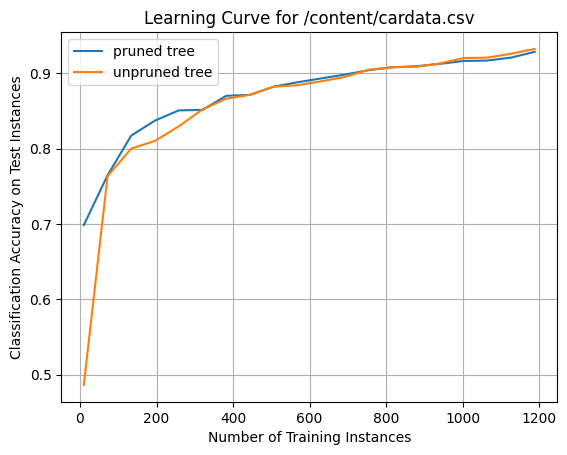

In [ ]:
#Driver Program/Main Body
from matplotlib import pyplot as plt

def main():
    file_name = "/content/cardata.csv"
    trace_runs_file = "training.txt"
    imagefile = "graph.png"
    outfile_tr = open(trace_runs_file,"w")
    data = parse(file_name)
    pruned_accuracies_avgs = []
    unpruned_accuracies_avgs = []
    random.shuffle(data)
    upper_limit = (round(len(data) * 0.9 * 0.8) - round(
        len(data) * 0.9 * 0.8) % 10) + 10
    if upper_limit <= 10:
        upper_limit = 50
    default = mode_class(data)
    validation_set = data[: 1*len(data)//10]
    data = data[1*len(data)//10 : len(data)]
    fold0, fold1, fold2, fold3, fold4 = get_five_folds(
        data)
    testset = []
    trainset = []
    testset.append(fold0)
    trainset.append(fold1 + fold2 + fold3 + fold4)
    testset.append(fold1)
    trainset.append(fold0 + fold2 + fold3 + fold4)
    testset.append(fold2)
    trainset.append(fold0 + fold1 + fold3 + fold4)
    testset.append(fold3)
    trainset.append(fold0 + fold1 + fold2 + fold4)
    testset.append(fold4)
    trainset.append(fold0 + fold1 + fold2 + fold3)

    step_size = len(trainset[0])//20

    for length in range(10, upper_limit, step_size):
        print('Number of Training Instances:', length)
        outfile_tr.write('Number of Training Instances:' + str(length) +"\n")
        pruned_accuracies = []
        unpruned_accuracies = []
        for experiment in range(5):
            train = trainset[experiment][: length]
            test = testset[experiment]
            tree = ID3(train, default)
            prune(tree, validation_set)
            acc = accuracy(tree, test)
            pruned_accuracies.append(acc)
            tree = ID3(train, default)
            acc = accuracy(tree, test)
            unpruned_accuracies.append(acc)
        avg_pruned_accuracies = sum(pruned_accuracies) / len(pruned_accuracies)
        avg_unpruned_accuracies = sum(unpruned_accuracies) / len(unpruned_accuracies)
        print("Classification Accuracy for Pruned Tree:", avg_pruned_accuracies)
        print("Classification Accuracy for Unpruned Tree:", avg_unpruned_accuracies)
        print()
        outfile_tr.write("Classification Accuracy for Pruned Tree:" + str(
            avg_pruned_accuracies) + "\n")
        outfile_tr.write("Classification Accuracy for Unpruned Tree:" + str(
                avg_unpruned_accuracies) +"\n\n")
        pruned_accuracies_avgs.append(avg_pruned_accuracies)
        unpruned_accuracies_avgs.append(avg_unpruned_accuracies)
    outfile_tr.close()
    plt.plot(range(10, upper_limit, step_size), pruned_accuracies_avgs, label='pruned tree')
    plt.plot(range(10, upper_limit, step_size), unpruned_accuracies_avgs, label='unpruned tree')
    plt.xlabel('Number of Training Instances')
    plt.ylabel('Classification Accuracy on Test Instances')
    plt.grid(True)
    plt.title("Learning Curve for " +  str(file_name))
    plt.legend()
    plt.savefig(imagefile)
    plt.show()
main()

(1728, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     1728 non-null   object
 1   Buying    1728 non-null   object
 2   Maint     1728 non-null   object
 3   Doors     1728 non-null   object
 4   Persons   1728 non-null   object
 5   Lug Boot  1728 non-null   object
 6   Safety    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None
   Class Buying  Maint Doors Persons Lug Boot Safety
0  unacc  vhigh  vhigh     2       2    small    low
1  unacc  vhigh  vhigh     2       2    small    med
2  unacc  vhigh  vhigh     2       2    small   high
3  unacc  vhigh  vhigh     2       2      med    low
4  unacc  vhigh  vhigh     2       2      med    med
|--- feature_12 <= 0.50
|   |--- feature_19 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |

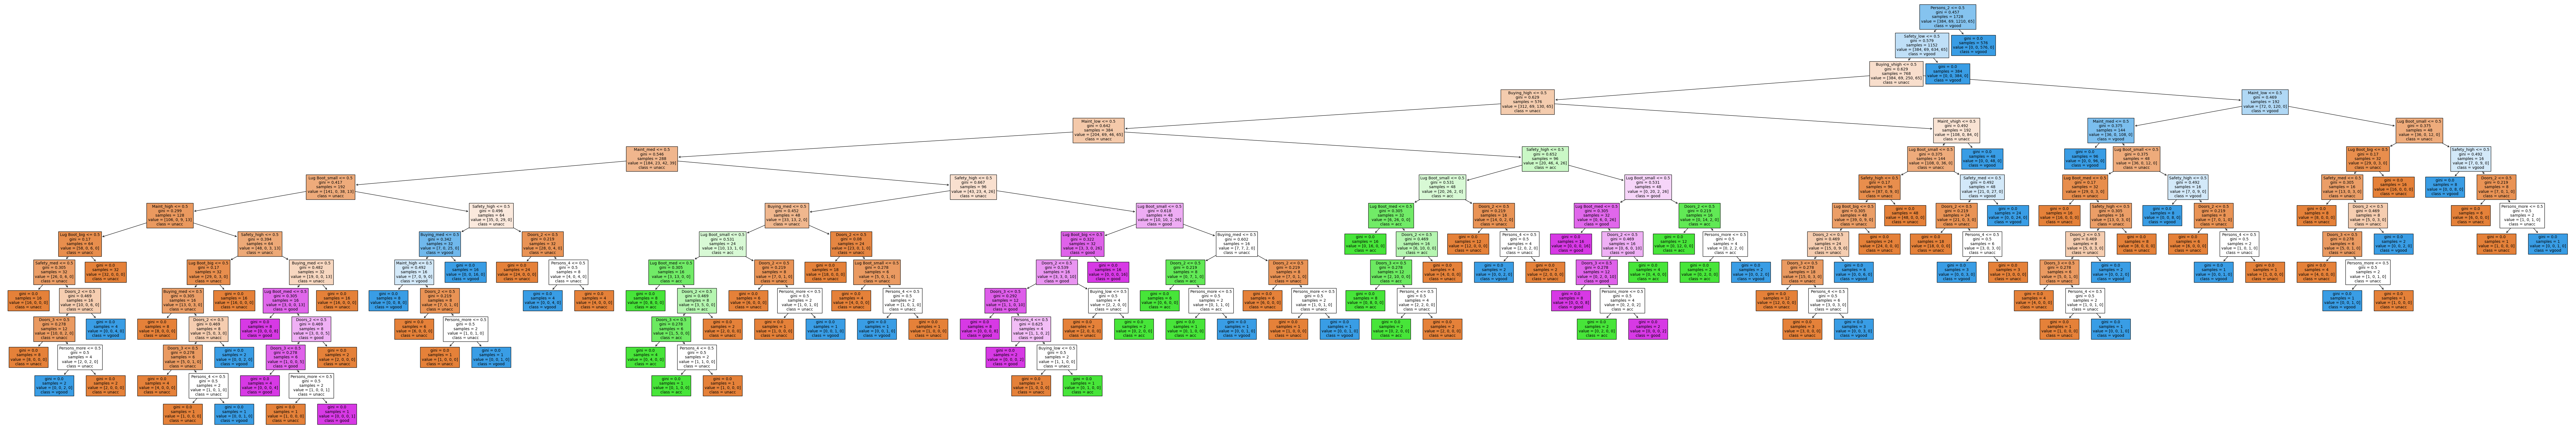

In [ ]:
#Printing The Tree With Scitlearn Library
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd

df = pd.read_csv(r"/content/cardata.csv")
print(df.shape)
print(df.info())
print(df.head())

df_encoded = pd.get_dummies(df.drop('Class', axis=1))

X = df_encoded
y = df['Class']

clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

text_representation = tree.export_text(clf)
print(text_representation)
with open("decision_tree.log", "w") as fout:
    fout.write(text_representation)

fig = plt.figure(figsize=(120, 20))
_ = tree.plot_tree(clf,
                   feature_names=X.columns,
                   class_names=df['Class'].unique().tolist(),
                   filled=True,
                   fontsize=10)
fig.savefig("decision_tree.png")
